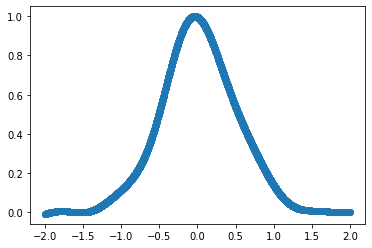

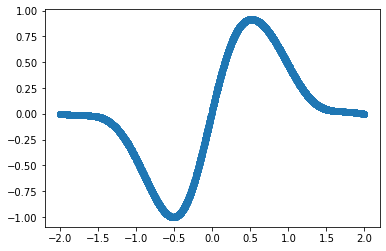

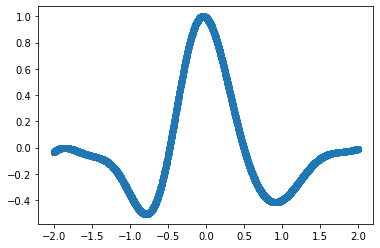

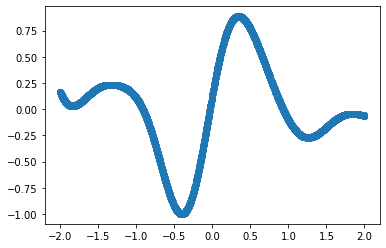

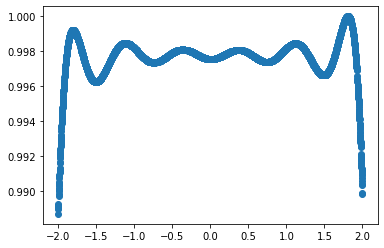

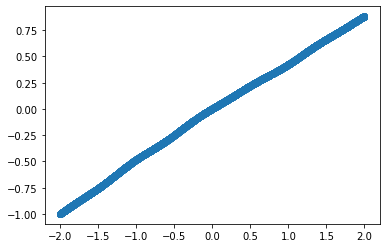

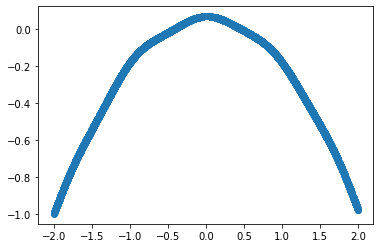

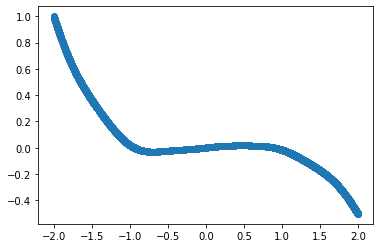

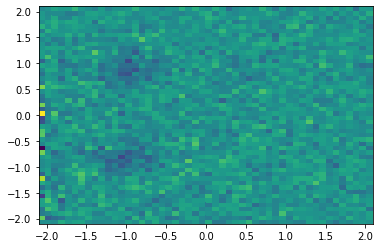

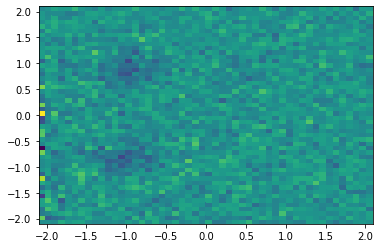

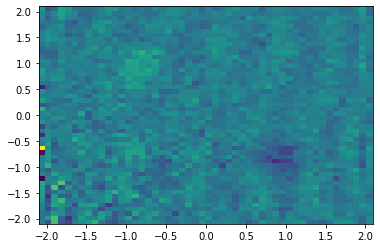

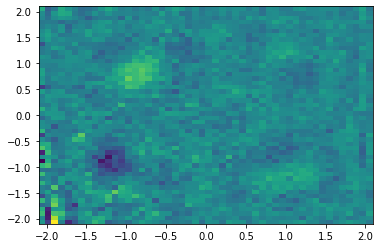

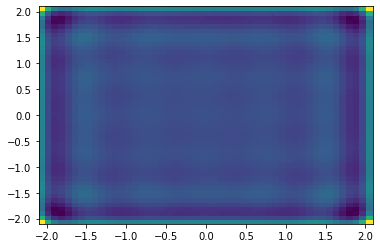

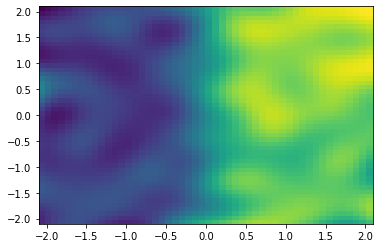

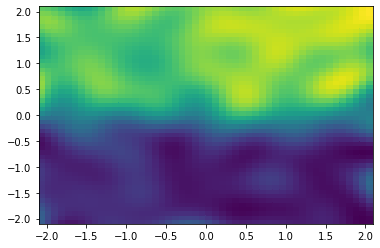

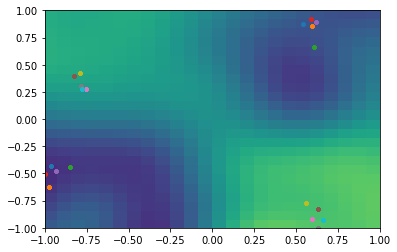

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import numpy as np
import scipy as sp
import scipy.io
import matplotlib.pyplot as plt

from addPath import *
addPath()

from d3s import domain
from d3s import kernels
from d3s import algorithms
from d3s import systems

plt.ion()

#%% Ornstein-Uhlenbeck process
Omega = domain.discretization(np.array([[-2, 2]]), np.array([50]))

f = systems.OrnsteinUhlenbeck(0.001, 500)
X = Omega.randPerBox(100)
Y = f(X)

sigma = np.sqrt(0.3)
epsilon = 0.1
k = kernels.gaussianKernel(sigma)

evs = 4 # number of eigenfunctions to be computed

# Perron-Frobenius
d, V = algorithms.kedmd(X, Y, k, epsilon=epsilon, evs=evs, operator='P')
for i in range(evs):
    plt.figure()
    plt.scatter(X, np.real(V[:, i]/np.amax(abs(V[:, i]))))

# Koopman
d, V = algorithms.kedmd(X, Y, k, epsilon=epsilon, evs=evs, operator='K')
for i in range(evs):
    plt.figure()
    plt.scatter(X, np.real(V[:, i]/np.amax(abs(V[:, i]))))

#%% quadruple-well problem
data = sp.io.loadmat('data/quadrupleWell_uniform.mat', squeeze_me=True)
for s in data.keys():
    if s[:2] == '__' and s[-2:] == '__': continue
    exec('%s = data["%s"]' % (s, s)) # load variables from mat file into main scope

Omega = domain.discretization(bounds, boxes)

evs = 4 # number of eigenfunctions to be computed

# define kernel and regularization parameter
sigma = np.sqrt(2)
epsilon = 0
k = kernels.gaussianKernel(sigma)

# Perron-Frobenius
d, V = algorithms.kedmd(X, Y, k, epsilon=epsilon, evs=evs, operator='P')
for i in range(evs):
    plt.figure()
    Omega.plot(np.real(V[:, i]))

# change bandwidth of kernel and regularization parameter
k.sigma = 0.5
epsilon = 0.1

# Koopman
d, V = algorithms.kedmd(X, Y, k, epsilon=epsilon, evs=evs, operator='K')
for i in range(evs):
    plt.figure()
    Omega.plot(np.real(V[:, i]))

#%% string kernel example
words = ('computer', 'browser', 'tablet', 'internet', 'e-mail',
         'hurricane', 'storm', 'rain', 'damage', 'weather',
         'president', 'state', 'department', 'election', 'midterm',
         'science', 'stem', 'therapy', 'cell', 'disease')
data = [line.rstrip('\n') for line in open('data/news.txt')]

X = data[0:-1]
Y = data[1:]

k_s = kernels.stringKernel()
k = lambda x, y : np.exp(-k_s(x, y)**2/0.4)

d, V = algorithms.kedmd(X, Y, k, epsilon=0.1, evs=4, operator='P')

# normalize eigenfunctions
for i in range(4):
    V[:, i] /= np.max(abs(V[:, i]))

# plot second vs. third dominant eigenfunction
plt.axis([-1, 1, -1, 1])
for i in range(len(words)):
    indices = [j for j, x in enumerate(data[:-1]) if x == words[i]]
    plt.plot(np.real(V[indices, 1]), np.real(V[indices, 2]), '.')
